In [42]:
import sys
import os
import networkx as nx
import numpy as np
import pandas as pd
from scipy.stats import binom

from matplotlib import pyplot as plt
sys.path.append("../../../")
%matplotlib inline

In [15]:
#os.listdir("../../../")

In [17]:
from graph_dynamics.dynamics import PittWalker
from graph_dynamics.random_measures import process
from graph_dynamics.networks.datatypes import CaronFoxGraphs

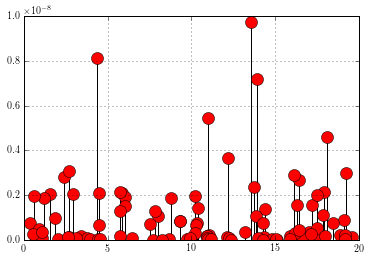

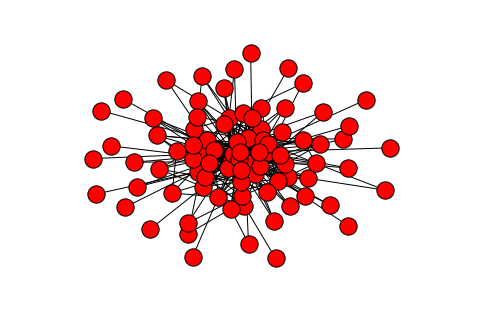

In [20]:
tau = 1.
alpha = 20.
sigma = alpha
process_identifier_string = "GammaProcess"

G = process.GammaProcess(process_identifier_string,
                         sigma,
                         tau,
                         alpha,
                         K=100)
G.plotProcess()
graph_identifier = "CaronFoxTest"
CaronFoxGraph = CaronFoxGraphs(graph_identifier,G)
nx.draw(CaronFoxGraph.network)
plt.show()

In [21]:
#Dynamics 
phi = 1.
rho = 1.

Palla = PittWalker.PallaDynamics(phi,rho,CaronFoxGraph)
#C_TimeSeries = Palla.generateHiddenPath(10)
Networks_TimeSeries = Palla.generateNetworkPaths(10)

{1.6392112976720541: 1.0, 16.86856198571601: 1.0, 0.98702185304954115: 1.0, 13.927837096834503: 1.0, 1.6005877017349168: 1.0, 15.245841551044279: 3.0, 2.6478331859118343: 1.0, 13.037166162882457: 1.0, 18.738568981712287: 1.0, 2.6186920114265644: 2.0, 2.5128817269483772: 3.0, 12.447541632477128: 1.0, 18.080093261757504: 1.0, 7.8582899296317343: 1.0, 3.8771099345417337: 1.0, 6.0122861828779399: 1.0, 12.690271829515897: 1.0, 10.901216965497202: 2.0, 14.476300226575647: 2.0, 14.84633593257308: 1.0}
Time Iteration 1
Number of old tables 26.0
Number of current nodes 92
Time Iteration 2
Number of old tables 75.0
Number of current nodes 145
Time Iteration 3
Number of old tables 135.0
Number of current nodes 166
Time Iteration 4
Number of old tables 291.0
Number of current nodes 177
Time Iteration 5
Number of old tables 309.0
Number of current nodes 195
Time Iteration 6
Number of old tables 443.0
Number of current nodes 184
Time Iteration 7
Number of old tables 428.0
Number of current nodes 212

In [22]:
len(Networks_TimeSeries)

10

In [25]:
network_3 = Networks_TimeSeries[3]

In [38]:
network_3.edge.keys()[:10]

[9.1263275199367371,
 0.11188200133339654,
 3.8594740261223714,
 5.4027102878770616,
 3.6213274254265637,
 5.2387753082997772,
 16.673034897218887,
 4.8885231668952063,
 5.1217346931673173,
 6.9830609168555213]

In [46]:
network_3.edge[9.1263275199367371][0.17683895532624838]

{'weight': 8}

In [36]:
network_3.number_of_nodes()

166

In [63]:
def forgetInteractions(network,rho):
    """
    """
    for node, neigh in network.edge.iteritems():
        for ng, weight in neigh.iteritems():
            network[node][ng]["weight"] = binom.rvs(weight["weight"],np.exp(-rho))
    return network

In [64]:
graph = nx.Graph()
for i in range(20):
    for j in range(20):
        graph.add_edge(i,j,weight=int(np.random.uniform(10,20)))

In [65]:
graph.edge

{0: {0: {'weight': 18},
  1: {'weight': 16},
  2: {'weight': 13},
  3: {'weight': 13},
  4: {'weight': 13},
  5: {'weight': 17},
  6: {'weight': 10},
  7: {'weight': 13},
  8: {'weight': 14},
  9: {'weight': 16},
  10: {'weight': 12},
  11: {'weight': 19},
  12: {'weight': 14},
  13: {'weight': 17},
  14: {'weight': 13},
  15: {'weight': 17},
  16: {'weight': 15},
  17: {'weight': 18},
  18: {'weight': 10},
  19: {'weight': 15}},
 1: {0: {'weight': 16},
  1: {'weight': 18},
  2: {'weight': 17},
  3: {'weight': 19},
  4: {'weight': 15},
  5: {'weight': 14},
  6: {'weight': 18},
  7: {'weight': 18},
  8: {'weight': 19},
  9: {'weight': 14},
  10: {'weight': 18},
  11: {'weight': 18},
  12: {'weight': 15},
  13: {'weight': 10},
  14: {'weight': 11},
  15: {'weight': 15},
  16: {'weight': 19},
  17: {'weight': 11},
  18: {'weight': 10},
  19: {'weight': 12}},
 2: {0: {'weight': 13},
  1: {'weight': 17},
  2: {'weight': 19},
  3: {'weight': 15},
  4: {'weight': 14},
  5: {'weight': 16},
  6

In [66]:
forgetInteractions(graph,1.)

In [67]:
graph.edge

{0: {0: {'weight': 6},
  1: {'weight': 4},
  2: {'weight': 1},
  3: {'weight': 4},
  4: {'weight': 1},
  5: {'weight': 4},
  6: {'weight': 5},
  7: {'weight': 1},
  8: {'weight': 3},
  9: {'weight': 3},
  10: {'weight': 1},
  11: {'weight': 4},
  12: {'weight': 1},
  13: {'weight': 4},
  14: {'weight': 2},
  15: {'weight': 2},
  16: {'weight': 3},
  17: {'weight': 2},
  18: {'weight': 0},
  19: {'weight': 3}},
 1: {0: {'weight': 4},
  1: {'weight': 5},
  2: {'weight': 2},
  3: {'weight': 4},
  4: {'weight': 2},
  5: {'weight': 0},
  6: {'weight': 4},
  7: {'weight': 1},
  8: {'weight': 3},
  9: {'weight': 1},
  10: {'weight': 5},
  11: {'weight': 3},
  12: {'weight': 3},
  13: {'weight': 0},
  14: {'weight': 0},
  15: {'weight': 2},
  16: {'weight': 4},
  17: {'weight': 1},
  18: {'weight': 1},
  19: {'weight': 2}},
 2: {0: {'weight': 1},
  1: {'weight': 2},
  2: {'weight': 6},
  3: {'weight': 4},
  4: {'weight': 1},
  5: {'weight': 3},
  6: {'weight': 3},
  7: {'weight': 3},
  8: {'we